In [2]:
# Import Required Packages 
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
 
from sklearn import metrics

In [3]:
# to remove teh printing barrier
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# TO print multiple outputs in single line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:

app_train = pd.read_csv("application_train.csv")

In [5]:
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
app_train.tail()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

In [7]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
app_train.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
df = app_train.copy()
for col in df.columns:
    print("=============== " + str(col) +" Start===============")
    print("\nUnique values :: " + str(df[col].nunique()))
    print("\nMissing values Count:: " + str(df[col].isnull().sum()))
#     print("\nUnique Values Count:: \n" + str(df[col].value_counts()))
    print("=============== " + str(col) +" End===============")


=============== SK_ID_CURR Start===============

Unique values :: 307511

Missing values Count:: 0
=============== SK_ID_CURR End===============
=============== TARGET Start===============

Unique values :: 2

Missing values Count:: 0
=============== TARGET End===============
=============== NAME_CONTRACT_TYPE Start===============

Unique values :: 2

Missing values Count:: 0
=============== NAME_CONTRACT_TYPE End===============
=============== CODE_GENDER Start===============

Unique values :: 3

Missing values Count:: 0
=============== CODE_GENDER End===============
=============== FLAG_OWN_CAR Start===============

Unique values :: 2

Missing values Count:: 0
=============== FLAG_OWN_CAR End===============
=============== FLAG_OWN_REALTY Start===============

Unique values :: 2

Missing values Count:: 0
=============== FLAG_OWN_REALTY End===============
=============== CNT_CHILDREN Start===============

Unique values :: 15

Missing values Count:: 0
=============== CNT_CHILDREN End==


Missing values Count:: 210199
=============== LIVINGAPARTMENTS_AVG End===============
=============== LIVINGAREA_AVG Start===============

Unique values :: 5199

Missing values Count:: 154350
=============== LIVINGAREA_AVG End===============
=============== NONLIVINGAPARTMENTS_AVG Start===============

Unique values :: 386

Missing values Count:: 213514
=============== NONLIVINGAPARTMENTS_AVG End===============
=============== NONLIVINGAREA_AVG Start===============

Unique values :: 3290

Missing values Count:: 169682
=============== NONLIVINGAREA_AVG End===============
=============== APARTMENTS_MODE Start===============

Unique values :: 760

Missing values Count:: 156061
=============== APARTMENTS_MODE End===============
=============== BASEMENTAREA_MODE Start===============

Unique values :: 3841

Missing values Count:: 179943
=============== BASEMENTAREA_MODE End===============
=============== YEARS_BEGINEXPLUATATION_MODE Start===============

Unique values :: 221

Missing values


Missing values Count:: 0
=============== FLAG_DOCUMENT_13 End===============
=============== FLAG_DOCUMENT_14 Start===============

Unique values :: 2

Missing values Count:: 0
=============== FLAG_DOCUMENT_14 End===============
=============== FLAG_DOCUMENT_15 Start===============

Unique values :: 2

Missing values Count:: 0
=============== FLAG_DOCUMENT_15 End===============
=============== FLAG_DOCUMENT_16 Start===============

Unique values :: 2

Missing values Count:: 0
=============== FLAG_DOCUMENT_16 End===============
=============== FLAG_DOCUMENT_17 Start===============

Unique values :: 2

Missing values Count:: 0
=============== FLAG_DOCUMENT_17 End===============
=============== FLAG_DOCUMENT_18 Start===============

Unique values :: 2

Missing values Count:: 0
=============== FLAG_DOCUMENT_18 End===============
=============== FLAG_DOCUMENT_19 Start===============

Unique values :: 2

Missing values Count:: 0
=============== FLAG_DOCUMENT_19 End===============
==========

In [10]:
columns = df.columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

In [11]:
missing_value_df

percent_missing
SK_ID_CURR                           0.000000
TARGET                               0.000000
NAME_CONTRACT_TYPE                   0.000000
CODE_GENDER                          0.000000
FLAG_OWN_CAR                         0.000000
FLAG_OWN_REALTY                      0.000000
CNT_CHILDREN                         0.000000
AMT_INCOME_TOTAL                     0.000000
AMT_CREDIT                           0.000000
AMT_ANNUITY                          0.003902
AMT_GOODS_PRICE                      0.090403
NAME_TYPE_SUITE                      0.420148
NAME_INCOME_TYPE                     0.000000
NAME_EDUCATION_TYPE                  0.000000
NAME_FAMILY_STATUS                   0.000000
NAME_HOUSING_TYPE                    0.000000
REGION_POPULATION_RELATIVE           0.000000
DAYS_BIRTH                           0.000000
DAYS_EMPLOYED                        0.000000
DAYS_REGISTRATION                    0.000000
DAYS_ID_PUBLISH                      0.000000
OWN_CAR_AGE                         65.990810
FLAG_MOBIL                           0.000000
FLAG_EMP_PHONE                       0.000000
FLAG_WORK_PHONE                      0.000000
FLAG_CONT_MOBILE                     0.000000
FLAG_PHONE                           0.000000
FLAG_EMAIL                           0.000000
OCCUPATION_TYPE                     31.345545
CNT_FAM_MEMBERS                      0.000650
REGION_RATING_CLIENT                 0.000000
REGION_RATING_CLIENT_W_CITY          0.000000
WEEKDAY_APPR_PROCESS_START           0.000000
HOUR_APPR_PROCESS_START              0.000000
REG_REGION_NOT_LIVE_REGION           0.000000
REG_REGION_NOT_WORK_REGION           0.000000
LIVE_REGION_NOT_WORK_REGION          0.000000
REG_CITY_NOT_LIVE_CITY               0.000000
REG_CITY_NOT_WORK_CITY               0.000000
LIVE_CITY_NOT_WORK_CITY              0.000000
ORGANIZATION_TYPE                    0.000000
EXT_SOURCE_1                        56.381073
EXT_SOURCE_2                         0.214626
EXT_SOURCE_3                        19.825307
APARTMENTS_AVG                      50.749729
BASEMENTAREA_AVG                    58.515956
YEARS_BEGINEXPLUATATION_AVG         48.781019
YEARS_BUILD_AVG                     66.497784
COMMONAREA_AVG                      69.872297
ELEVATORS_AVG                       53.295980
ENTRANCES_AVG                       50.348768
FLOORSMAX_AVG                       49.760822
FLOORSMIN_AVG                       67.848630
LANDAREA_AVG                        59.376738
LIVINGAPARTMENTS_AVG                68.354953
LIVINGAREA_AVG                      50.193326
NONLIVINGAPARTMENTS_AVG             69.432963
NONLIVINGAREA_AVG                   55.179164
APARTMENTS_MODE                     50.749729
BASEMENTAREA_MODE                   58.515956
YEARS_BEGINEXPLUATATION_MODE        48.781019
YEARS_BUILD_MODE                    66.497784
COMMONAREA_MODE                     69.872297
ELEVATORS_MODE                      53.295980
ENTRANCES_MODE                      50.348768
FLOORSMAX_MODE                      49.760822
FLOORSMIN_MODE                      67.848630
LANDAREA_MODE                       59.376738
LIVINGAPARTMENTS_MODE               68.354953
LIVINGAREA_MODE                     50.193326
NONLIVINGAPARTMENTS_MODE            69.432963
NONLIVINGAREA_MODE                  55.179164
APARTMENTS_MEDI                     50.749729
BASEMENTAREA_MEDI                   58.515956
YEARS_BEGINEXPLUATATION_MEDI        48.781019
YEARS_BUILD_MEDI                    66.497784
COMMONAREA_MEDI                     69.872297
ELEVATORS_MEDI                      53.295980
ENTRANCES_MEDI                      50.348768
FLOORSMAX_MEDI                      49.760822
FLOORSMIN_MEDI                      67.848630
LANDAREA_MEDI                       59.376738
LIVINGAPARTMENTS_MEDI               68.354953
LIVINGAREA_MEDI                     50.193326
NONLIVINGAPARTMENTS_MEDI            69.432963
NONLIVINGAREA_MEDI                  55.179164
FONDKAPREMONT_MODE          

In [12]:
missing_value_df['unique_values_count'] = df.nunique() 
missing_value_df['unique_percentage'] = (df.nunique()/df.shape[0])*100 

In [13]:
missing_value_df['missing_values'] = df.isnull().sum() 

In [14]:
missing_value_df[missing_value_df['percent_missing']>70]

Empty DataFrame
Columns: [percent_missing, unique_values_count, unique_percentage, missing_values]
Index: []

In [15]:
missing_value_df

percent_missing  unique_values_count  \
SK_ID_CURR                           0.000000               307511   
TARGET                               0.000000                    2   
NAME_CONTRACT_TYPE                   0.000000                    2   
CODE_GENDER                          0.000000                    3   
FLAG_OWN_CAR                         0.000000                    2   
FLAG_OWN_REALTY                      0.000000                    2   
CNT_CHILDREN                         0.000000                   15   
AMT_INCOME_TOTAL                     0.000000                 2548   
AMT_CREDIT                           0.000000                 5603   
AMT_ANNUITY                          0.003902                13672   
AMT_GOODS_PRICE                      0.090403                 1002   
NAME_TYPE_SUITE                      0.420148                    7   
NAME_INCOME_TYPE                     0.000000                    8   
NAME_EDUCATION_TYPE                  0.000000                    5   
NAME_FAMILY_STATUS                   0.000000                    6   
NAME_HOUSING_TYPE                    0.000000                    6   
REGION_POPULATION_RELATIVE           0.000000                   81   
DAYS_BIRTH                           0.000000                17460   
DAYS_EMPLOYED                        0.000000                12574   
DAYS_REGISTRATION                    0.000000                15688   
DAYS_ID_PUBLISH                      0.000000                 6168   
OWN_CAR_AGE                         65.990810                   62   
FLAG_MOBIL                           0.000000                    2   
FLAG_EMP_PHONE                       0.000000                    2   
FLAG_WORK_PHONE                      0.000000                    2   
FLAG_CONT_MOBILE                     0.000000                    2   
FLAG_PHONE                           0.000000                    2   
FLAG_EMAIL                           0.000000                    2   
OCCUPATION_TYPE                     31.345545                   18   
CNT_FAM_MEMBERS                      0.000650                   17   
REGION_RATING_CLIENT                 0.000000                    3   
REGION_RATING_CLIENT_W_CITY          0.000000                    3   
WEEKDAY_APPR_PROCESS_START           0.000000                    7   
HOUR_APPR_PROCESS_START              0.000000                   24   
REG_REGION_NOT_LIVE_REGION           0.000000                    2   
REG_REGION_NOT_WORK_REGION           0.000000                    2   
LIVE_REGION_NOT_WORK_REGION          0.000000                    2   
REG_CITY_NOT_LIVE_CITY               0.000000                    2   
REG_CITY_NOT_WORK_CITY               0.000000                    2   
LIVE_CITY_NOT_WORK_CITY              0.000000                    2   
ORGANIZATION_TYPE                    0.000000                   58   
EXT_SOURCE_1                        56.381073               114584   
EXT_SOURCE_2                         0.214626               119831   
EXT_SOURCE_3                        19.825307                  814   
APARTMENTS_AVG                      50.749729                 2339   
BASEMENTAREA_AVG                    58.515956                 3780   
YEARS_BEGINEXPLUATATION_AVG         48.781019                  285   
YEARS_BUILD_AVG                     66.497784                  149   
COMMONAREA_AVG                      69.872297                 3181   
ELEVATORS_AVG                       53.295980                  257   
ENTRANCES_AVG                       50.348768                  285   
FLOORSMAX_AVG                       49.760822                  403   
FLOORSMIN_AVG                       67.848630                  305   
LANDAREA_AVG                        59.376738                 3527   
LIVINGAPARTMENTS_AVG                68.354953                 1868   
LIVINGAREA_AVG                      50.193326                 5199   
NONLIVINGAPARTMENTS_AVG             69.4

In [16]:
missing_value_df[missing_value_df['percent_missing']>0].index

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [17]:
df[df['AMT_GOODS_PRICE'].isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724       100837       0    Revolving loans           F            N   
5937      106955       0    Revolving loans           F            N   
6425      107494       0    Revolving loans           F            N   
6703      107822       0    Revolving loans           F            N   
7647      108913       0    Revolving loans           M            N   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
724                Y             2           45000.0    135000.0       6750.0   
5937               N             0          157500.0    450000.0      22500.0   
6425               N             0           67500.0    202500.0      10125.0   
6703               N             1          121500.0    180000.0       9000.0   
7647               Y             0          180000.0    450000.0      22500.0   

      AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
724               NaN             NaN  Commercial associate   
5937              NaN             NaN               Working   
6425              NaN             NaN               Working   
6703              NaN             NaN               Working   
7647              NaN             NaN               Working   

                NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
724   Secondary / secondary special               Married  House / apartment   
5937  Secondary / secondary special               Married  House / apartment   
6425               Higher education               Married  House / apartment   
6703  Secondary / secondary special        Civil marriage  House / apartment   
7647               Higher education  Single / not married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
724                     0.024610      -10072           -381   
5937                    0.010006      -11993          -2921   
6425                    0.008474       -9727          -2712   
6703                    0.011657      -11079           -899   
7647                    0.032561       -9986          -1847   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
724              -519.0            -1834          NaN           1   
5937            -1289.0            -1948          NaN           1   
6425            -4132.0             -800          NaN           1   
6703            -3765.0             -572          NaN           1   
7647            -4762.0             -506          NaN           1   

      FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
724                1                1                 1           0   
5937               1                1                 1           1   
6425               1                1                 1           1   
6703               1                1                 1           1   
7647               1                1                 1           1   

      FLAG_EMAIL        OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
724            0             Core staff              4.0   
5937           1  Private service staff              2.0   
6425           0            Accountants              2.0   
6703           0               Managers              3.0   
7647           0         Security staff              1.0   

      REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
724                      2                            2   
5937                     2                            2   
6425                     2                            2   
6703                     1                            1   
7647                     1                            1   

     WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
724                   WEDNESDAY                       14   
5937                   SATURDAY                       13   
6425                  WEDNESDAY                       18   
6703                  WEDNESDAY                  

In [18]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [19]:
## Missing Values 
### AMT_ANNUITY should be replaced with  0
### AMT_GOODS_PRICE should be replaced with  0
### NAME_TYPE_SUITE will be replaced with Unaccompanied as it is 
### OCCUPATION_TYPE with others

In [20]:
df['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)
df[['AMT_ANNUITY','AMT_GOODS_PRICE']].fillna(0, inplace=True)
df['OCCUPATION_TYPE'].fillna('others', inplace=True)

C:\Users\chait\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


## NAME_TYPE_SUITE 

In [21]:
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [22]:
missing_value_df[missing_value_df['percent_missing']>0].index

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

## OWN_CAR_AGE

In [23]:
df['OWN_CAR_AGE'].value_counts()

7.0     7424
6.0     6382
3.0     6370
8.0     5887
2.0     5852
4.0     5557
1.0     5280
9.0     5020
10.0    4806
14.0    4594
13.0    4566
12.0    4257
11.0    4161
5.0     3595
15.0    3580
16.0    3355
17.0    2899
64.0    2443
18.0    2418
0.0     2134
19.0    1864
20.0    1527
21.0    1462
22.0    1250
24.0    1150
23.0    1067
65.0     891
25.0     865
26.0     580
28.0     542
27.0     483
29.0     397
30.0     326
31.0     267
32.0     208
34.0     183
35.0     157
33.0     132
36.0     124
38.0      97
40.0      85
39.0      78
37.0      75
41.0      58
42.0      42
44.0      21
43.0      19
54.0      12
45.0      11
49.0       6
46.0       5
55.0       4
51.0       3
63.0       2
91.0       2
57.0       1
48.0       1
50.0       1
47.0       1
52.0       1
69.0       1
56.0       1
Name: OWN_CAR_AGE, dtype: int64

Checking if user does not has a car  and replace the value with zero . 

If ther is not information yet we will replace with zero 

In [24]:
# df[(df['FLAG_OWN_CAR']=='N') & (df['OWN_CAR_AGE'].isnull())]


df['OWN_CAR_AGE'] = np.where(df['FLAG_OWN_CAR']=='N', 0,df['OWN_CAR_AGE'])

In [25]:
df['OWN_CAR_AGE'].isnull().sum()

5

In [26]:
df['OWN_CAR_AGE'].fillna(0, inplace=True)

## OCCUPATION_TYPE

In [27]:
df[df['OCCUPATION_TYPE'].isnull()].shape
df[df['OCCUPATION_TYPE'].isnull()].head()

(0, 122)

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, ...]
Index: []

In [28]:
df['OCCUPATION_TYPE'].value_counts()

others                   96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [29]:
df['OCCUPATION_TYPE'].fillna('Others', inplace=True)

## CNT_FAM_MEMBERS

In [30]:


df['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
16.0         2
14.0         2
20.0         2
12.0         2
15.0         1
11.0         1
13.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [31]:
df[df['CNT_FAM_MEMBERS'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              NaN   Unaccompanied  Commercial associate   
187348      29250.0              NaN   Unaccompanied  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221      -12396          -1161   
187348                    0.031329      -12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
41982             -3265.0            -4489          0.0           1   
187348            -1597.0            -1571          0.0           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
41982                1                1                 1           1   
187348               1                0                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982            0        Managers              NaN                     2   
187348           0     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  \
41982                         1               Insurance      0.628564   
187348                        0  Business Entity Type 2           NaN   

        EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
41982       0.700618           NaN             NaN               NaN   
187348      0.645168      0.670652          0.1031            0.0467   

        YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
41982                           NaN              NaN             NaN   
187348                        0.997           0.9592          0.0081   

        ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
41982             NaN            NaN            NaN            NaN   
187348           0.08          0.069          0.375         0.4167   

        LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
41982            NaN                   NaN             NaN   
187348           NaN                0.0841           0.088   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
41982                       NaN                NaN              NaN   
187348                      0.0                0.0            0.105   

        BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
41982                 NaN                           NaN               NaN   
187348             0.0485                         0.997            0.9608   

  

## EXT_SOURCE_1 , 2, 3

In [32]:
df[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].isnull().sum()

EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
dtype: int64

In [33]:
df[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].describe()

EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3
count  134133.000000  3.068510e+05  246546.000000
mean        0.502130  5.143927e-01       0.510853
std         0.211062  1.910602e-01       0.194844
min         0.014568  8.173617e-08       0.000527
25%         0.334007  3.924574e-01       0.370650
50%         0.505998  5.659614e-01       0.535276
75%         0.675053  6.636171e-01       0.669057
max         0.962693  8.549997e-01       0.896010

In [34]:
## For all the normalised columns we will fill with mean value 

In [35]:
norm_col = ['EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', ]

In [36]:
for col in norm_col:
    df[col].fillna(df[col].mean(), inplace=True)

In [37]:
norm_mode_col = ['WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [ ]:
## filling FONDKAPREMONT_MODE, HOUSETYPE_MODE 'Not specified '
## WALLSMATERIAL_MODE filling with others

In [38]:
df['FONDKAPREMONT_MODE'].fillna("not specified", inplace=True)
df['HOUSETYPE_MODE'].fillna("not specified", inplace=True)

In [39]:
## TOTALAREA_MODE with mean 
df['TOTALAREA_MODE'].fillna(df['TOTALAREA_MODE'].mean(), inplace=True)

In [40]:
df['WALLSMATERIAL_MODE'].fillna("Others", inplace=True)

In [46]:
# df['EMERGENCYSTATE_MODE'] we wil replace by No
df['EMERGENCYSTATE_MODE'].value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [42]:
df['EMERGENCYSTATE_MODE'].replace({'not specified':'No'}, inplace=True)

AttributeError: 'Series' object has no attribute 'columns'

In [43]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
# 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
#        'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
#        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
#        'AMT_REQ_CREDIT_BUREAU_YEAR'
        
#         Considering the NAn as teh case where there are no enquries 
        
        

In [47]:
df[['DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','CNT_FAM_MEMBERS',
       'AMT_REQ_CREDIT_BUREAU_YEAR','EMERGENCYSTATE_MODE']] = df[['DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_ANNUITY', 'AMT_GOODS_PRICE','CNT_FAM_MEMBERS',
       'AMT_REQ_CREDIT_BUREAU_YEAR','EMERGENCYSTATE_MODE']].fillna(0)

In [48]:
df.isnull().sum()[df.isnull().sum()>0].index


Index([], dtype='object')

In [108]:
# Extracting the Textual fields

In [49]:
obk_col = df.select_dtypes(['object']).columns

In [50]:

for col in obk_col:
    print("=============== " + str(col) +" Start===============")
    print("\nUnique values :: " + str(df[col].nunique()))
    print("\nMissing values Count:: " + str(df[col].isnull().sum()))
    print("\nUnique Values Count:: \n" + str(df[col].value_counts()))
    print("=============== " + str(col) +" End===============")


=============== NAME_CONTRACT_TYPE Start===============

Unique values :: 2

Missing values Count:: 0

Unique Values Count:: 
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
=============== NAME_CONTRACT_TYPE End===============
=============== CODE_GENDER Start===============

Unique values :: 3

Missing values Count:: 0

Unique Values Count:: 
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
=============== CODE_GENDER End===============
=============== FLAG_OWN_CAR Start===============

Unique values :: 2

Missing values Count:: 0

Unique Values Count:: 
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
=============== FLAG_OWN_CAR End===============
=============== FLAG_OWN_REALTY Start===============

Unique values :: 2

Missing values Count:: 0

Unique Values Count:: 
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
=============== FLAG_OWN_REALTY End===============
=============== NAME_TYPE_SUIT

In [ ]:
# Replace the columns with yes or no with 1, 0 
# replace WEEKDAY_APPR_PROCESS_START with numbers 

In [51]:
df['WEEKDAY_APPR_PROCESS_START'] = df['WEEKDAY_APPR_PROCESS_START'].replace({'SUNDAY':0, 'MONDAY':1, 'TUESDAY':2, 'WEDNESDAY':3,
                                                                            'THURSDAY':4, 'FRIDAY':5, 'SATURDAY':6
                                                                            })

In [52]:
df.replace({'Yes':1, 'No':0, 'Y':1, 'N':0}, inplace=True)

In [53]:
obk_col = df.select_dtypes(['object']).columns

In [54]:

for col in obk_col:
    print("=============== " + str(col) +" Start===============")
    print("\nUnique values :: " + str(df[col].nunique()))
    print("\nMissing values Count:: " + str(df[col].isnull().sum()))
    print("\nUnique Values Count:: \n" + str(df[col].value_counts()))
    print("=============== " + str(col) +" End===============")


=============== NAME_CONTRACT_TYPE Start===============

Unique values :: 2

Missing values Count:: 0

Unique Values Count:: 
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
=============== NAME_CONTRACT_TYPE End===============
=============== CODE_GENDER Start===============

Unique values :: 3

Missing values Count:: 0

Unique Values Count:: 
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
=============== CODE_GENDER End===============
=============== NAME_TYPE_SUITE Start===============

Unique values :: 7

Missing values Count:: 0

Unique Values Count:: 
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
=============== NAME_TYPE_SUITE End===============
=============== NAME_INCOME_TYPE Start===============

Unique values :: 8

Missing values Count::

<Figure size 2160x2160 with 0 Axes>

<AxesSubplot:>

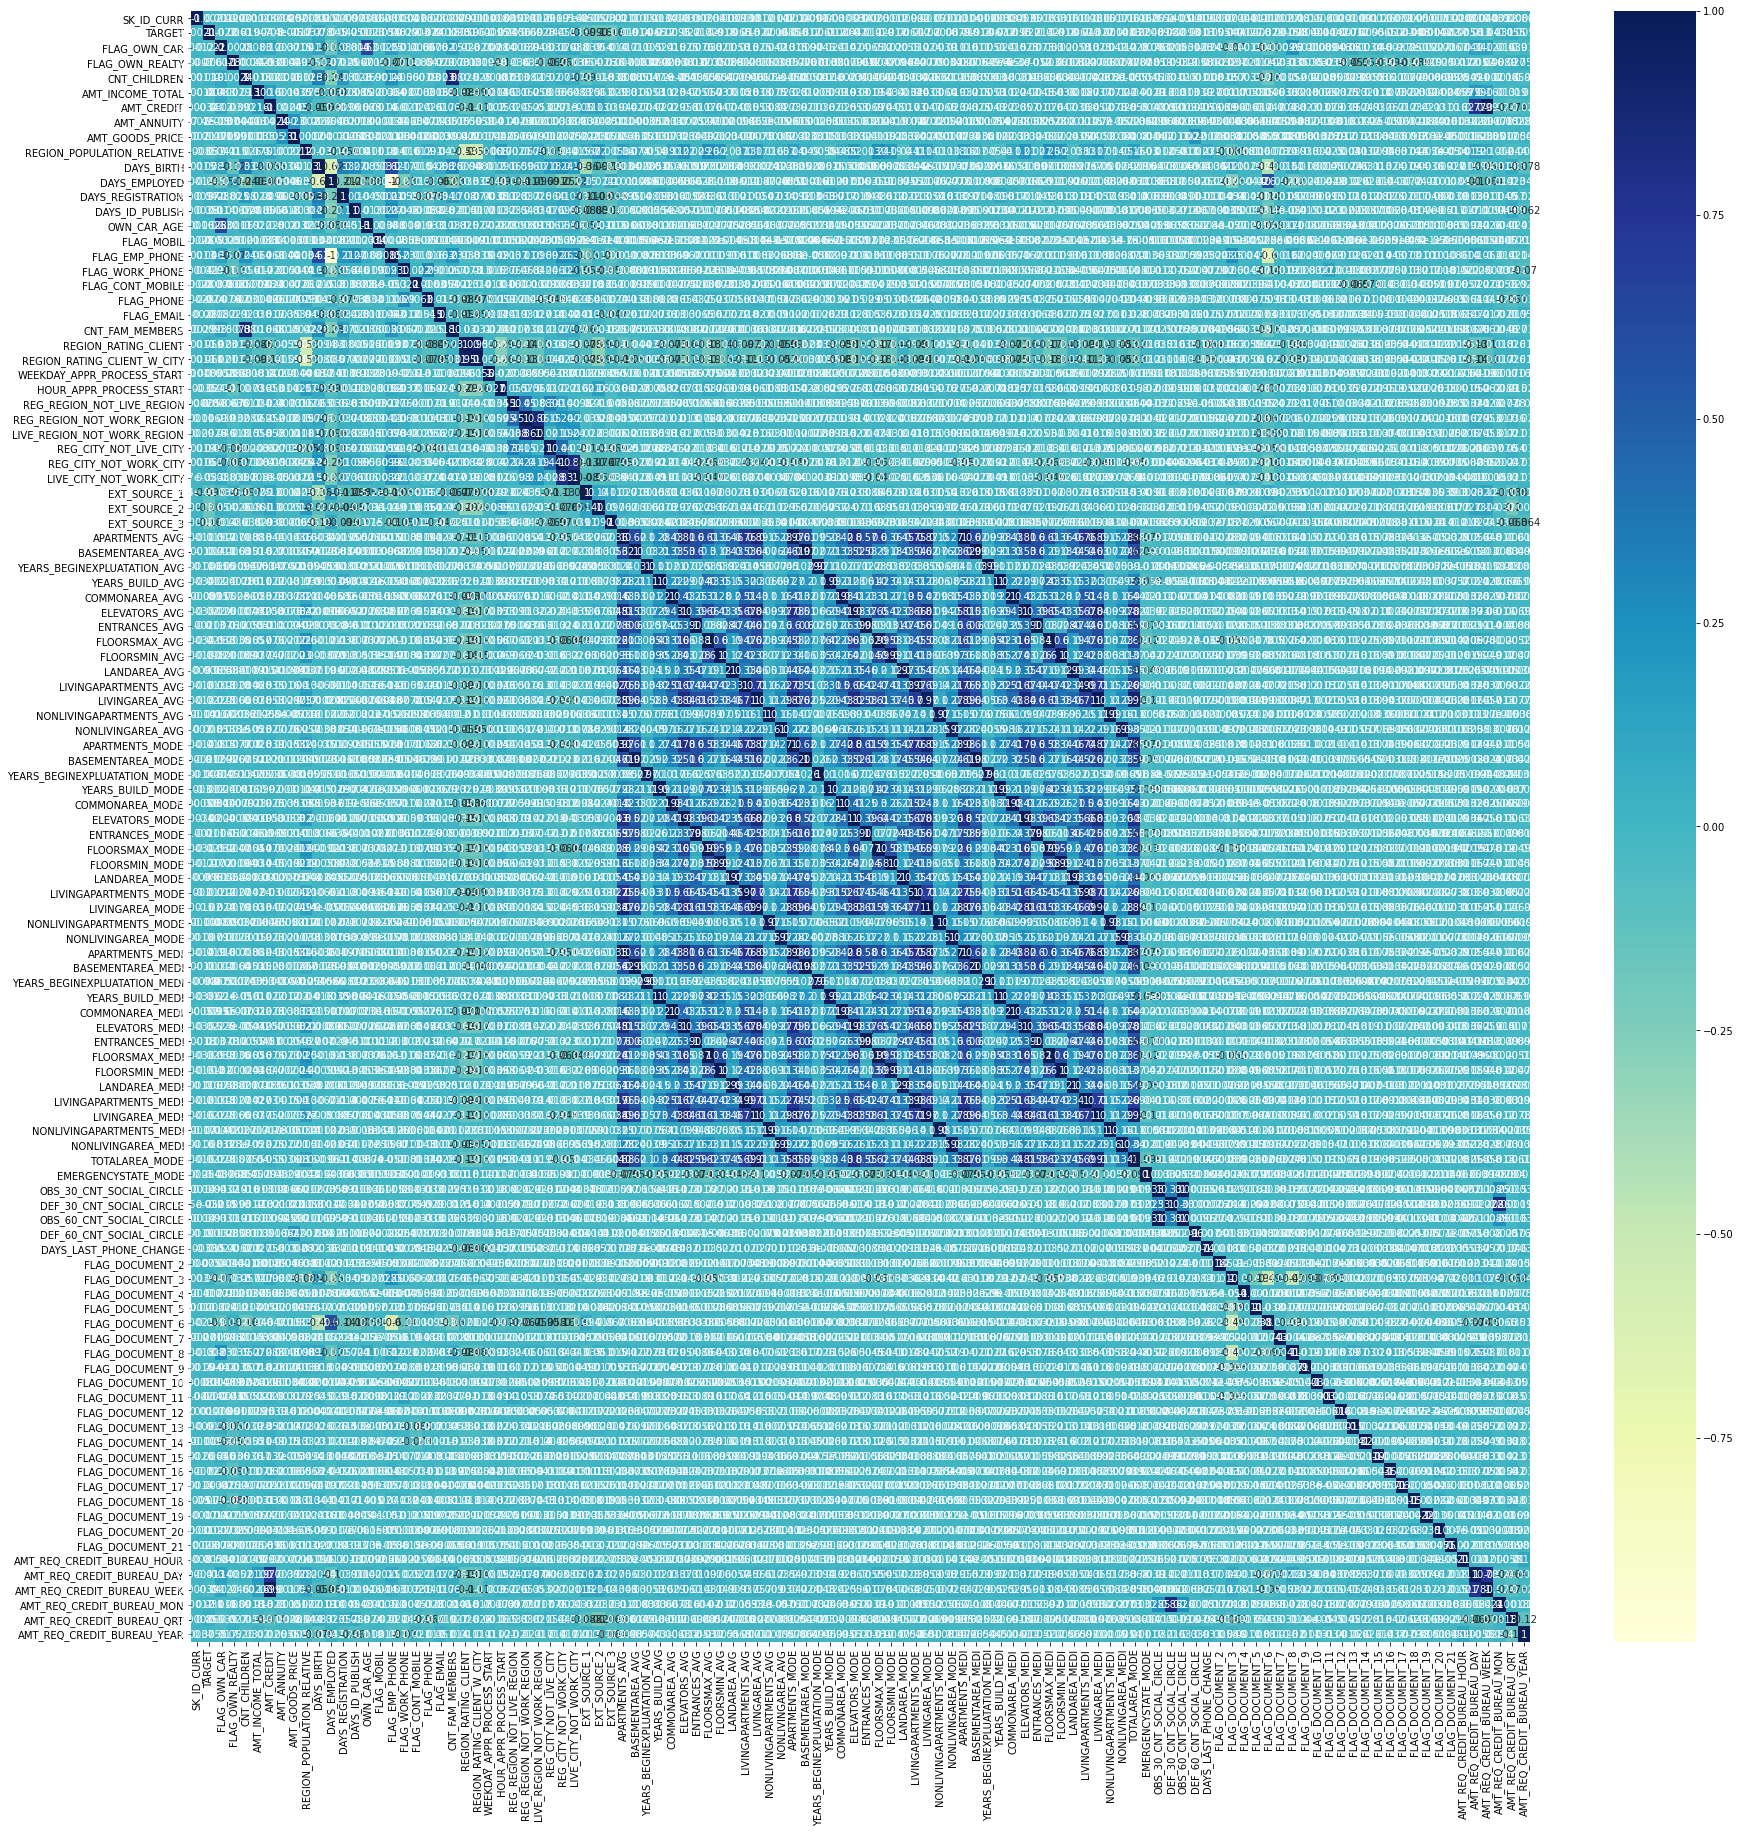

In [55]:
df_corr=df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(df_corr,annot=True, cmap="YlGnBu")

In [123]:
df.to_csv("Application_train_cleaned.csv")

In [8]:
df = pd.read_csv(r"C:\Users\chait\OneDrive - fs-students.de\FSFM_MADS\Semester_1\Business_Data Analytics\Data_Analytics_Group_work\home-credit-default-risk\Cleaned_dataset\Application_train_cleaned.csv")

In [12]:
# custom designed function
df_corr=df.corr()

In [15]:
extract_x_columns(df_corr['TARGET'])

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3'], dtype='object')

In [14]:
extract_x_columns['TARGET']

TypeError: 'function' object is not subscriptable

In [9]:
def extract_x_columns(df_y):
    X = df_y[df_y.between(0.1,0.9)].index        
    X = X.append(df_y[df_y.between(-0.9,-0.1)].index)    
    return X